In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%%
########################################################
######## X-MAC: Trade_off Energy with Delay using GT
########################################################
# Radio subsystem varaible definition

P     = 32.            # Payload [byte]
R     = 31.25          # CC2420 Radio Rate [kbyte/s = Byte/ms]
D     = 8              # number of levels
C     = 5              # neighbors size (connectivity)
N     = C*D**2         # number of nodes
#### BE CAREFUL:  Times are in milliseconds (ms)
Lmax  = 5000.          # Maximal allowed Delay (ms)
Emax  = 1.             # MAximal Energy Budjet (J)

L_pbl = 4.             # preamble length [byte]
L_hdr = 9. + L_pbl     # header length [byte]
L_ack = 9. + L_pbl     # ACK length [byte]
L_ps  = 5. + L_pbl     # preamble strobe length [byte]

Tal  = 0.95            # ack listen period [ms]
Thdr = L_hdr/R         # header transmission duration [ms]
Tack = L_ack/R         # ACK transmission duration [ms]
Tps  = L_ps/R          # preamble strobe transmission duration [ms]
Tcw  = 15*0.62         # Contention window size [ms]
Tcs  = 2.60            # Time [ms] to turn the radio into TX and probe the channel (carrier sense)
Tdata = Thdr + P/R + Tack # data packet transmission duration [ms]

### Sampling frequency

# Sleep period: Parameter Bounds
Tw_max  = 500.       # Maximum Duration of Tw in ms
Tw_min  = 100.       # Minimum Duration of Tw in ms

# Fs - first

In [ ]:
Fs   = 1.0/(60*5*1000)    # every 5 minutes
Fs

In [ ]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

In [ ]:
Es = []
Ls = []
Tws = []
for Tw in np.linspace(Tw_min, Tw_max, 10):
    Tws.append(Tw)
    Es.append(E(Tw))
    Ls.append(L(Tw))

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls, Es)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


# Fs - second

In [3]:
Fs   = 1.0/(60*30*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms
Fs

5.555555555555555e-07

In [4]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

(3.5500888115199998,
 1.7777777777777777e-05,
 0.00033901333333333336,
 4.0,
 52.048)

In [5]:
Es1 = []
Ls1 = []
Tws = []
for Tw in np.linspace(Tw_min, Tw_max, 10):
    Tws.append(Tw)
    Es1.append(E(Tw))
    Ls1.append(L(Tw))

Text(0, 0.5, 'E')

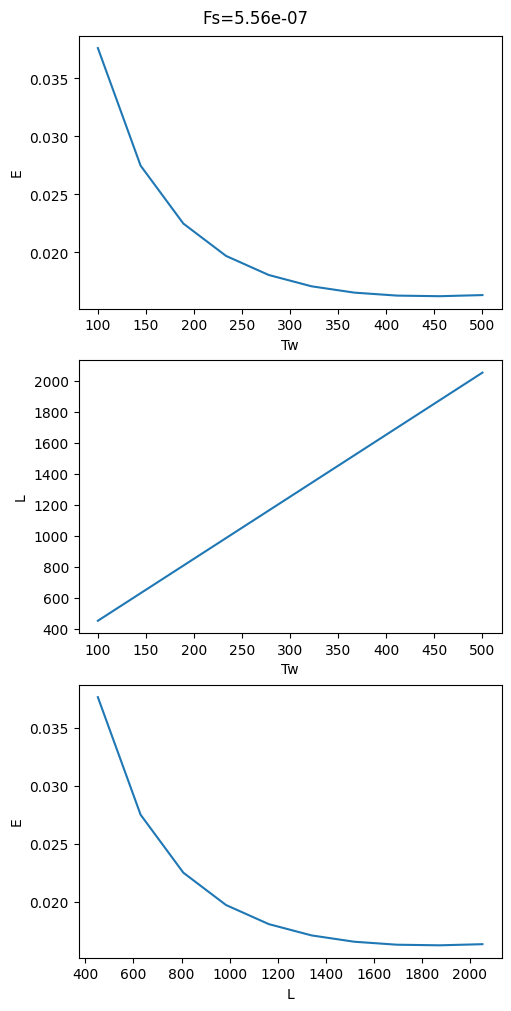

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es1)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls1)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls1, Es1)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


# Fs - third

In [ ]:
Fs   = 1.0/(60*1000)    # every minute
Fs

In [ ]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

In [ ]:
Es2 = []
Ls2 = []
Tws = []
for Tw in np.linspace(Tw_min, Tw_max, 10):
    Tws.append(Tw)
    Es2.append(E(Tw))
    Ls2.append(L(Tw))

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es2)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls2)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls2, Es2)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

#I wanted to create a big image so we can put it in the report, but we can stich the ones we already created and it would be perfect too.

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es2)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls2)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls2, Es2)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


# Part 2

In [7]:
from gpkit import Variable, Model
import numpy as np

In [8]:
Tw = Variable('Tw')

## Problem 1

In [28]:
E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3
obj = E_xmac

In [10]:
l_xmac = beta1 * Tw + beta2

In [17]:
# [100, 5000]
l_max = 500

In [18]:
import math

In [19]:
# TODO should be Ceil(Tw/(Tps+Tal)), maybe it's okay
Ttx = Tw /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata

In [20]:
I_0 = C
Etx_1 = (Tcs + Tal + Ttx) * F_out_worst

In [21]:
constraints = [
    l_xmac <= l_max,
    Tw >= Tw_min,
    I_0 * Etx_1 <= 1/4,   
]

In [22]:
prob = Model(obj, constraints)

In [23]:
prob.solve()

Using solver 'cvxopt'
 for 1 free variables
  in 4 posynomial inequalities.
Solving took 0.0074 seconds.


{'cost': 0.03403052928644462,
 'cost function': gpkit.Posynomial(3.55/Tw + 1.78e-05·Tw + 0.000339),
 'freevariables': {Tw: 111.98799937132334},
 'constants': {},
 'variables': {Tw: 111.98799937132334},
 'soltime': 0.007396221160888672,
 'sensitivities': {'constraints': {gpkit.PosynomialInequality(4·Tw + 52 ≤ 500): 0.8730313976203946,
   gpkit.PosynomialInequality(Tw ≥ 100): 5.1517681793854397e-11,
   gpkit.PosynomialInequality(5·(3.55 + Tw/1.24·0.619 + 0.416 + 1.86)·3.56e-05 ≤ 0.25): 8.085634202509015e-10},
  'models': {'': 0.8730313984804757},
  'cost': {Tw: -0.873031394019081},
  'variables': {Tw: 4.358359319138212e-09},
  'variablerisk': {Tw: 1.7460627924995566},
  'constants': {Tw: 4.358359319138212e-09}},
 'warnings': {'Solution Inconsistency': []}}

## Problem 2

In [26]:
l_xmac = beta1 * Tw + beta2
obj = l_xmac

In [29]:
E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3

In [30]:
# [0.5, 5]
E_budget = 5

In [31]:
constraints = [
    E_xmac <= E_budget,
    Tw >= Tw_min,
    I_0 * Etx_1 <= 1/4,   
]

In [32]:
prob = Model(obj, constraints)
prob.solve()

Using solver 'cvxopt'
 for 1 free variables
  in 4 posynomial inequalities.
Solving took 0.0131 seconds.


{'cost': 0.01622771090461456,
 'cost function': gpkit.Posynomial(3.55/Tw + 1.78e-05·Tw + 0.000339),
 'freevariables': {Tw: 446.869687696856},
 'constants': {},
 'variables': {Tw: 446.869687696856},
 'soltime': 0.013094663619995117,
 'sensitivities': {'constraints': {gpkit.PosynomialInequality(3.55/Tw + 1.78e-05·Tw + 0.000339 ≤ 5): 3.368710959568791e-09,
   gpkit.PosynomialInequality(Tw ≥ 100): 3.012940685221324e-08,
   gpkit.PosynomialInequality(5·(3.55 + Tw/1.24·0.619 + 0.416 + 1.86)·3.56e-05 ≤ 0.25): 3.435587489736733e-11},
  'models': {'': 3.35324736866794e-08},
  'cost': {Tw: 5.426312249534604e-08},
  'variables': {Tw: 2.4168071704727234e-08},
  'variablerisk': {Tw: 8.44268854091537e-08},
  'constants': {Tw: 2.4168071704727234e-08}},
 'warnings': {'Solution Inconsistency': []}}

# Problem 3

In [39]:
from scipy.optimize import minimize

In [60]:
# variables E_1, L_1, T_w
# maximize f -> minimize -f
fun = lambda x: - np.log(Emax - x[0]) - np.log(Lmax - x[1]) 

In [61]:
def cond(x):
    E_1, L_1, T_w = x
    Ttx = T_w /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata
    Etx_1 = (Tcs + Tal + Ttx) * F_out_worst
    return I_0 * Etx_1 - 1/4

In [62]:
cons = (
    # E_1, L_1, T_w
        {'type': 'ineq', 'fun': lambda x: alpha1 / x[2] + alpha2 * x[2] + alpha3 - Emax},
        {'type': 'ineq', 'fun': lambda x: alpha1 / x[2] + alpha2 * x[2] + alpha3 - x[0]},

        {'type': 'ineq', 'fun': lambda x: beta1 * x[2] + beta2 - Lmax},
        {'type': 'ineq', 'fun': lambda x: beta1 * x[2] + beta2 - x[1]},

        {'type': 'ineq', 'fun': lambda x: Tw_min - x[2]},
        
        {'type': 'ineq', 'fun': cond},
)

In [63]:
x0 = [0,0,0]
print(minimize(fun, x0, method='SLSQP', constraints=cons))

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: -8.517193191416238
       x: [ 0.000e+00  0.000e+00  0.000e+00]
     nit: 1
     jac: [ 1.000e+00  2.000e-04  0.000e+00]
    nfev: 4
    njev: 1


/tmp/ipykernel_9311/1904398876.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  {'type': 'ineq', 'fun': lambda x: alpha1 / x[2] + alpha2 * x[2] + alpha3 - Emax},
/tmp/ipykernel_9311/1904398876.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  {'type': 'ineq', 'fun': lambda x: alpha1 / x[2] + alpha2 * x[2] + alpha3 - x[0]},
/home/david/miniconda3/envs/toml/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
